In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('log2 3.csv')

# Display the first few rows
df.head()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
# Define the target and features
X = df.drop(columns=['Action_allow', 'Action_deny', 'Action_drop'])
y = df[['Action_allow', 'Action_deny', 'Action_drop']].values.argmax(axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_allow,Action_deny,Action_drop
count,24126.000000,24126.000000,24126.000000,24126.000000,2.412600e+04,24126.000000,2.412600e+04,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000
mean,0.741901,0.201653,0.171628,0.023470,1.525111e-04,0.000263,1.500309e-04,0.000167,0.005498,0.000162,0.000169,0.333333,0.333333,0.333333
std,0.251045,0.306598,0.294501,0.115099,6.802903e-03,0.006947,6.803198e-03,0.006812,0.031969,0.006729,0.006880,0.471414,0.471414,0.471414
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.735839,0.006763,0.000000,0.000000,2.471826e-08,0.000001,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.821479,0.006793,0.000000,0.000000,4.119710e-08,0.000002,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.899860,0.384312,0.261775,0.000812,5.602805e-07,0.000009,3.832731e-07,0.000004,0.004204,0.000000,0.000006,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

# Features selected from multiple feature selection
selected_features = ['Source Port','Destination Port', 'NAT Source Port', 'NAT Destination Port','Elapsed Time (sec)']

# Get the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Random Forest Results
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      0.99      0.99      2408
           2       0.99      1.00      0.99      2446

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238

Random Forest - Accuracy: 0.9959933683337938
Random Forest - Precision: 0.9960278707561064
Random Forest - Recall: 0.9960057154718513
Random Forest - F1 Score: 0.9960151930011308


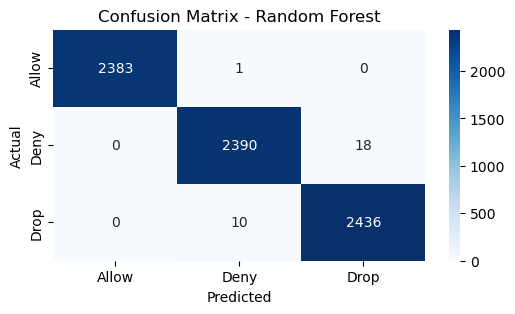

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest model with given parameters
rf = RandomForestClassifier(n_estimators=1000, max_depth=8, max_features='sqrt', min_samples_split=3, min_samples_leaf=1, bootstrap=True, random_state=42)

# Train the model
rf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_selected)

# Evaluate the model
print("Random Forest Results\n", classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_score_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Allow', 'Deny', 'Drop'], yticklabels=['Allow', 'Deny', 'Drop'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()


SVM Results
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      0.96      0.98      2408
           2       0.97      0.99      0.98      2446

    accuracy                           0.99      7238
   macro avg       0.99      0.99      0.99      7238
weighted avg       0.99      0.99      0.99      7238

SVM - Accuracy: 0.9853550704614534
SVM - Precision: 0.9857860939117576
SVM - Recall: 0.9853554029404418
SVM - F1 Score: 0.9854079970578938


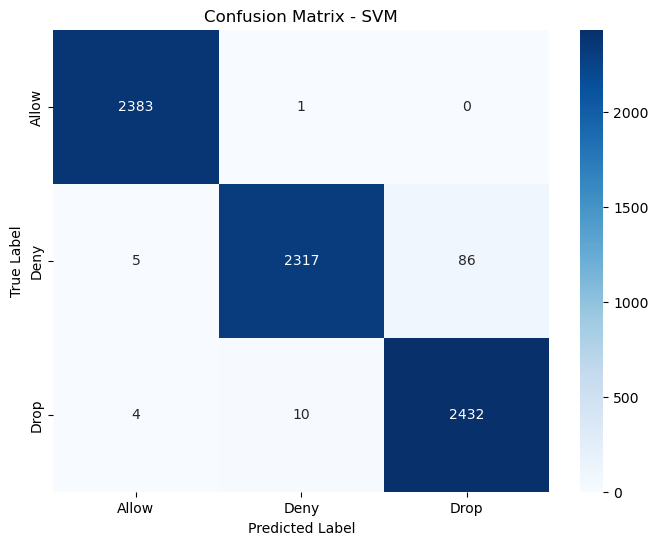

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM model with given parameters
svm = SVC(C=1000, gamma=1, kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_selected)

# Evaluate the model
print("SVM Results\n", classification_report(y_test, y_pred_svm))

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_score_svm = f1_score(y_test, y_pred_svm, average='macro')

print("SVM - Accuracy:", accuracy_svm)
print("SVM - Precision:", precision_svm)
print("SVM - Recall:", recall_svm)
print("SVM - F1 Score:", f1_score_svm)

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Allow', 'Deny', 'Drop'], yticklabels=['Allow', 'Deny', 'Drop'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - SVM')
plt.show()


KNN Results
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2384
           1       0.99      0.99      0.99      2408
           2       0.99      0.99      0.99      2446

    accuracy                           0.99      7238
   macro avg       0.99      0.99      0.99      7238
weighted avg       0.99      0.99      0.99      7238

KNN - Accuracy: 0.991157778391821
KNN - Precision: 0.9911894998325304
KNN - Recall: 0.9911400915622618
KNN - F1 Score: 0.9911609781049152
KNN - Confusion Matrix:
 [[2362   22    0]
 [   5 2380   23]
 [   4   10 2432]]


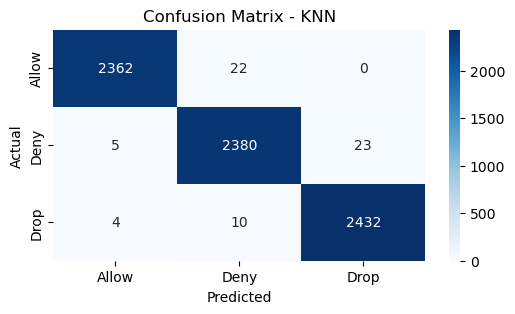

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the KNN model with k=3 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_selected)

# Evaluate the model
print("KNN Results\n", classification_report(y_test, y_pred_knn))

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_score_knn = f1_score(y_test, y_pred_knn, average='macro')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN - Accuracy:", accuracy_knn)
print("KNN - Precision:", precision_knn)
print("KNN - Recall:", recall_knn)
print("KNN - F1 Score:", f1_score_knn)
print("KNN - Confusion Matrix:\n", conf_matrix_knn)

# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Allow', 'Deny', 'Drop'], yticklabels=['Allow', 'Deny', 'Drop'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN')
plt.show()


Logistic Regression Results
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2384
           1       0.99      0.94      0.96      2408
           2       0.94      0.99      0.97      2446

    accuracy                           0.97      7238
   macro avg       0.98      0.97      0.98      7238
weighted avg       0.98      0.97      0.97      7238

Logistic Regression - Accuracy: 0.9749930920143686
Logistic Regression - Precision: 0.9763230376556882
Logistic Regression - Recall: 0.9749538332287426
Logistic Regression - F1 Score: 0.9751021498661755
Logistic Regression - Confusion Matrix:
 [[2369    5   10]
 [   5 2256  147]
 [   4   10 2432]]


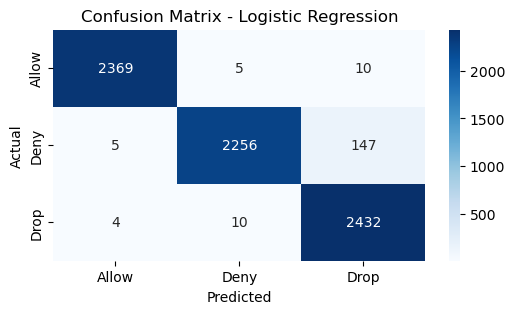

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model with given parameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=10, max_iter=10000)

# Train the model
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_selected)

# Evaluate the model
print("Logistic Regression Results\n", classification_report(y_test, y_pred_log_reg))

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='macro')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='macro')
f1_score_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression - Accuracy:", accuracy_log_reg)
print("Logistic Regression - Precision:", precision_log_reg)
print("Logistic Regression - Recall:", recall_log_reg)
print("Logistic Regression - F1 Score:", f1_score_log_reg)
print("Logistic Regression - Confusion Matrix:\n", conf_matrix_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Allow', 'Deny', 'Drop'], yticklabels=['Allow', 'Deny', 'Drop'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Target distribution after balancing:
allow    8042
deny     8042
drop     8042
Name: Action, dtype: int64
227/227 [==============================] - 0s 353us/step
Final Test Metrics:
Accuracy: 0.9620060790273556
Precision: 0.9646298211949768
Recall: 0.9618273792758488
F1 Score: 0.9623067015249792
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      2384
           1       0.98      0.93      0.96      2408
           2       0.91      0.99      0.95      2446

    accuracy                           0.96      7238
   macro avg       0.96      0.96      0.96      7238
weighted avg       0.96      0.96      0.96      7238



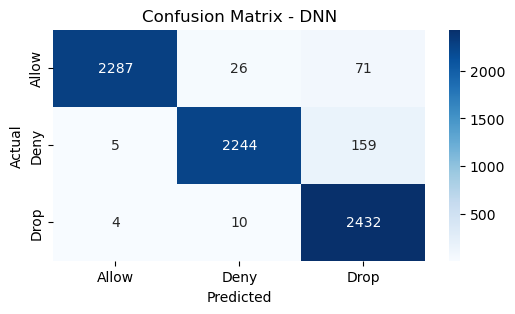

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Load the dataset
df = pd.read_csv('log2 3.csv')

# 1. Data Cleaning
# Drop rows with NaN, Null, or Inf values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# 2. Data Balancing
# Merge 'reset-both' and 'drop' classes
df['Action'] = df['Action'].replace({'reset-both': 'drop'})

# Define the target and features
X = df.drop('Action', axis=1)
y = df['Action']

# Apply undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Convert back to DataFrame
df = pd.DataFrame(X_res, columns=X.columns)
df['Action'] = y_res

# Display the target distribution after balancing
print("Target distribution after balancing:")
print(df['Action'].value_counts())

# One-hot encode the target variable
df = pd.get_dummies(df, columns=["Action"])

# Scaling the numerical features
scaler = MinMaxScaler()
columns_to_scale = df.columns.difference(['Action_allow', 'Action_deny', 'Action_drop'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.describe()

# Define the target and features after encoding
X = df.drop(columns=['Action_allow', 'Action_deny', 'Action_drop'])
y = df[['Action_allow', 'Action_deny', 'Action_drop']].values.argmax(axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection
selected_features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Elapsed Time (sec)']

# Get the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Model creation function
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='softmax'))  # Use softmax for multi-class classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Convert labels to categorical
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

# Final training and evaluation on the test set
model = create_model(X_train_selected.shape[1])
model.fit(X_train_selected, y_train_cat, epochs=50, batch_size=10, verbose=0)
y_pred_test = np.argmax(model.predict(X_test_selected), axis=-1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Calculate final metrics
accuracy_dnn_sel = accuracy_score(y_test_classes, y_pred_test)
precision_dnn_sel = precision_score(y_test_classes, y_pred_test, average='macro')
recall_dnn_sel = recall_score(y_test_classes, y_pred_test, average='macro')
f1_dnn_sel = f1_score(y_test_classes, y_pred_test, average='macro')

# Print final metrics
print("Final Test Metrics:")
print("Accuracy:", accuracy_dnn_sel)
print("Precision:", precision_dnn_sel)
print("Recall:", recall_dnn_sel)
print("F1 Score:", f1_dnn_sel)

# Final classification report
final_classification_report = classification_report(y_test_classes, y_pred_test)
print("Final Classification Report:\n", final_classification_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Allow', 'Deny', 'Drop'], yticklabels=['Allow', 'Deny', 'Drop'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - DNN')
plt.show()
